Introduction

The project is designed to detect fraudulent transactions in online payment systems using machine learning.

Model objective:

Classify transactions as fraud or normal (regular transaction).

Ensure high detection accuracy while minimizing false positives.

Preparation for work

Required files
dataset.csv — input dataset with transactions.

fraud_detection_model.pkl — saved trained model (created automatically).

Environment requirements
Install the following packages via pip:

Launching the project

Place the dataset.csv file in the same directory as the script.

Run the script:

Add the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib  # для сохранения модели
import plotly.express as px

Data loading and preliminary analysis
What happens:

Reading a CSV file into a pandas DataFrame (Specify the path to your file)

Display basic info. Outputting the first 5 rows and general information about the dataset.

Code:

In [ ]:
df = pd.read_csv('dataset.csv')

print(df.head())
print(df.info())

Output example:

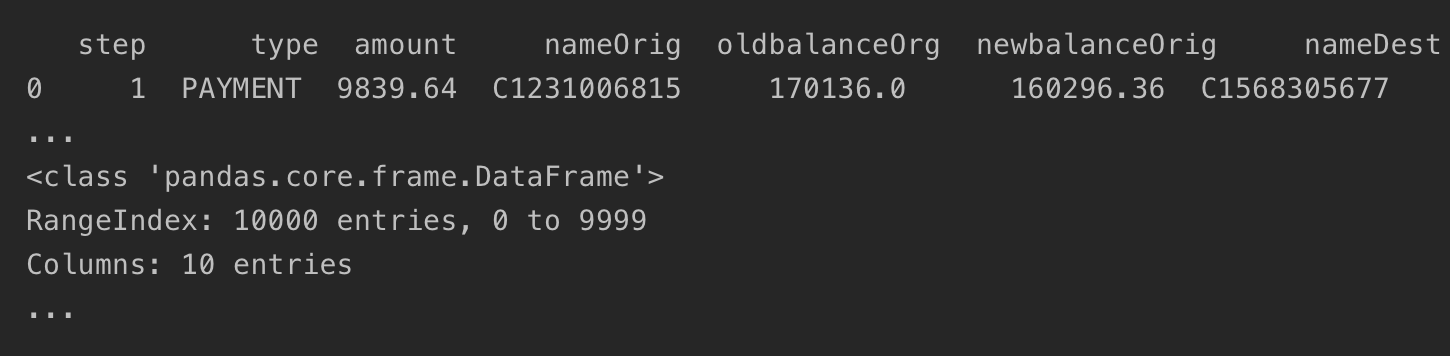

Visualization of class distribution
What happens:

A pie chart showing the proportion of fraudulent and normal transactions is constructed.

plotly.express.pie is used for interactive visualization.

Code:

In [ ]:
fig = px.pie(
    df,
    names='isFraud',
    title='Fraud vs Normal Transactions',
    labels={'0': 'Normal', '1': 'Fraud'},
    color_discrete_map={'0': 'green', '1': 'red'}
)
fig.show()

What you will see:
Interactive chart with labels:

Green sector — normal transactions (isFraud=0).

Red sector — fraudulent transactions (isFraud=1)

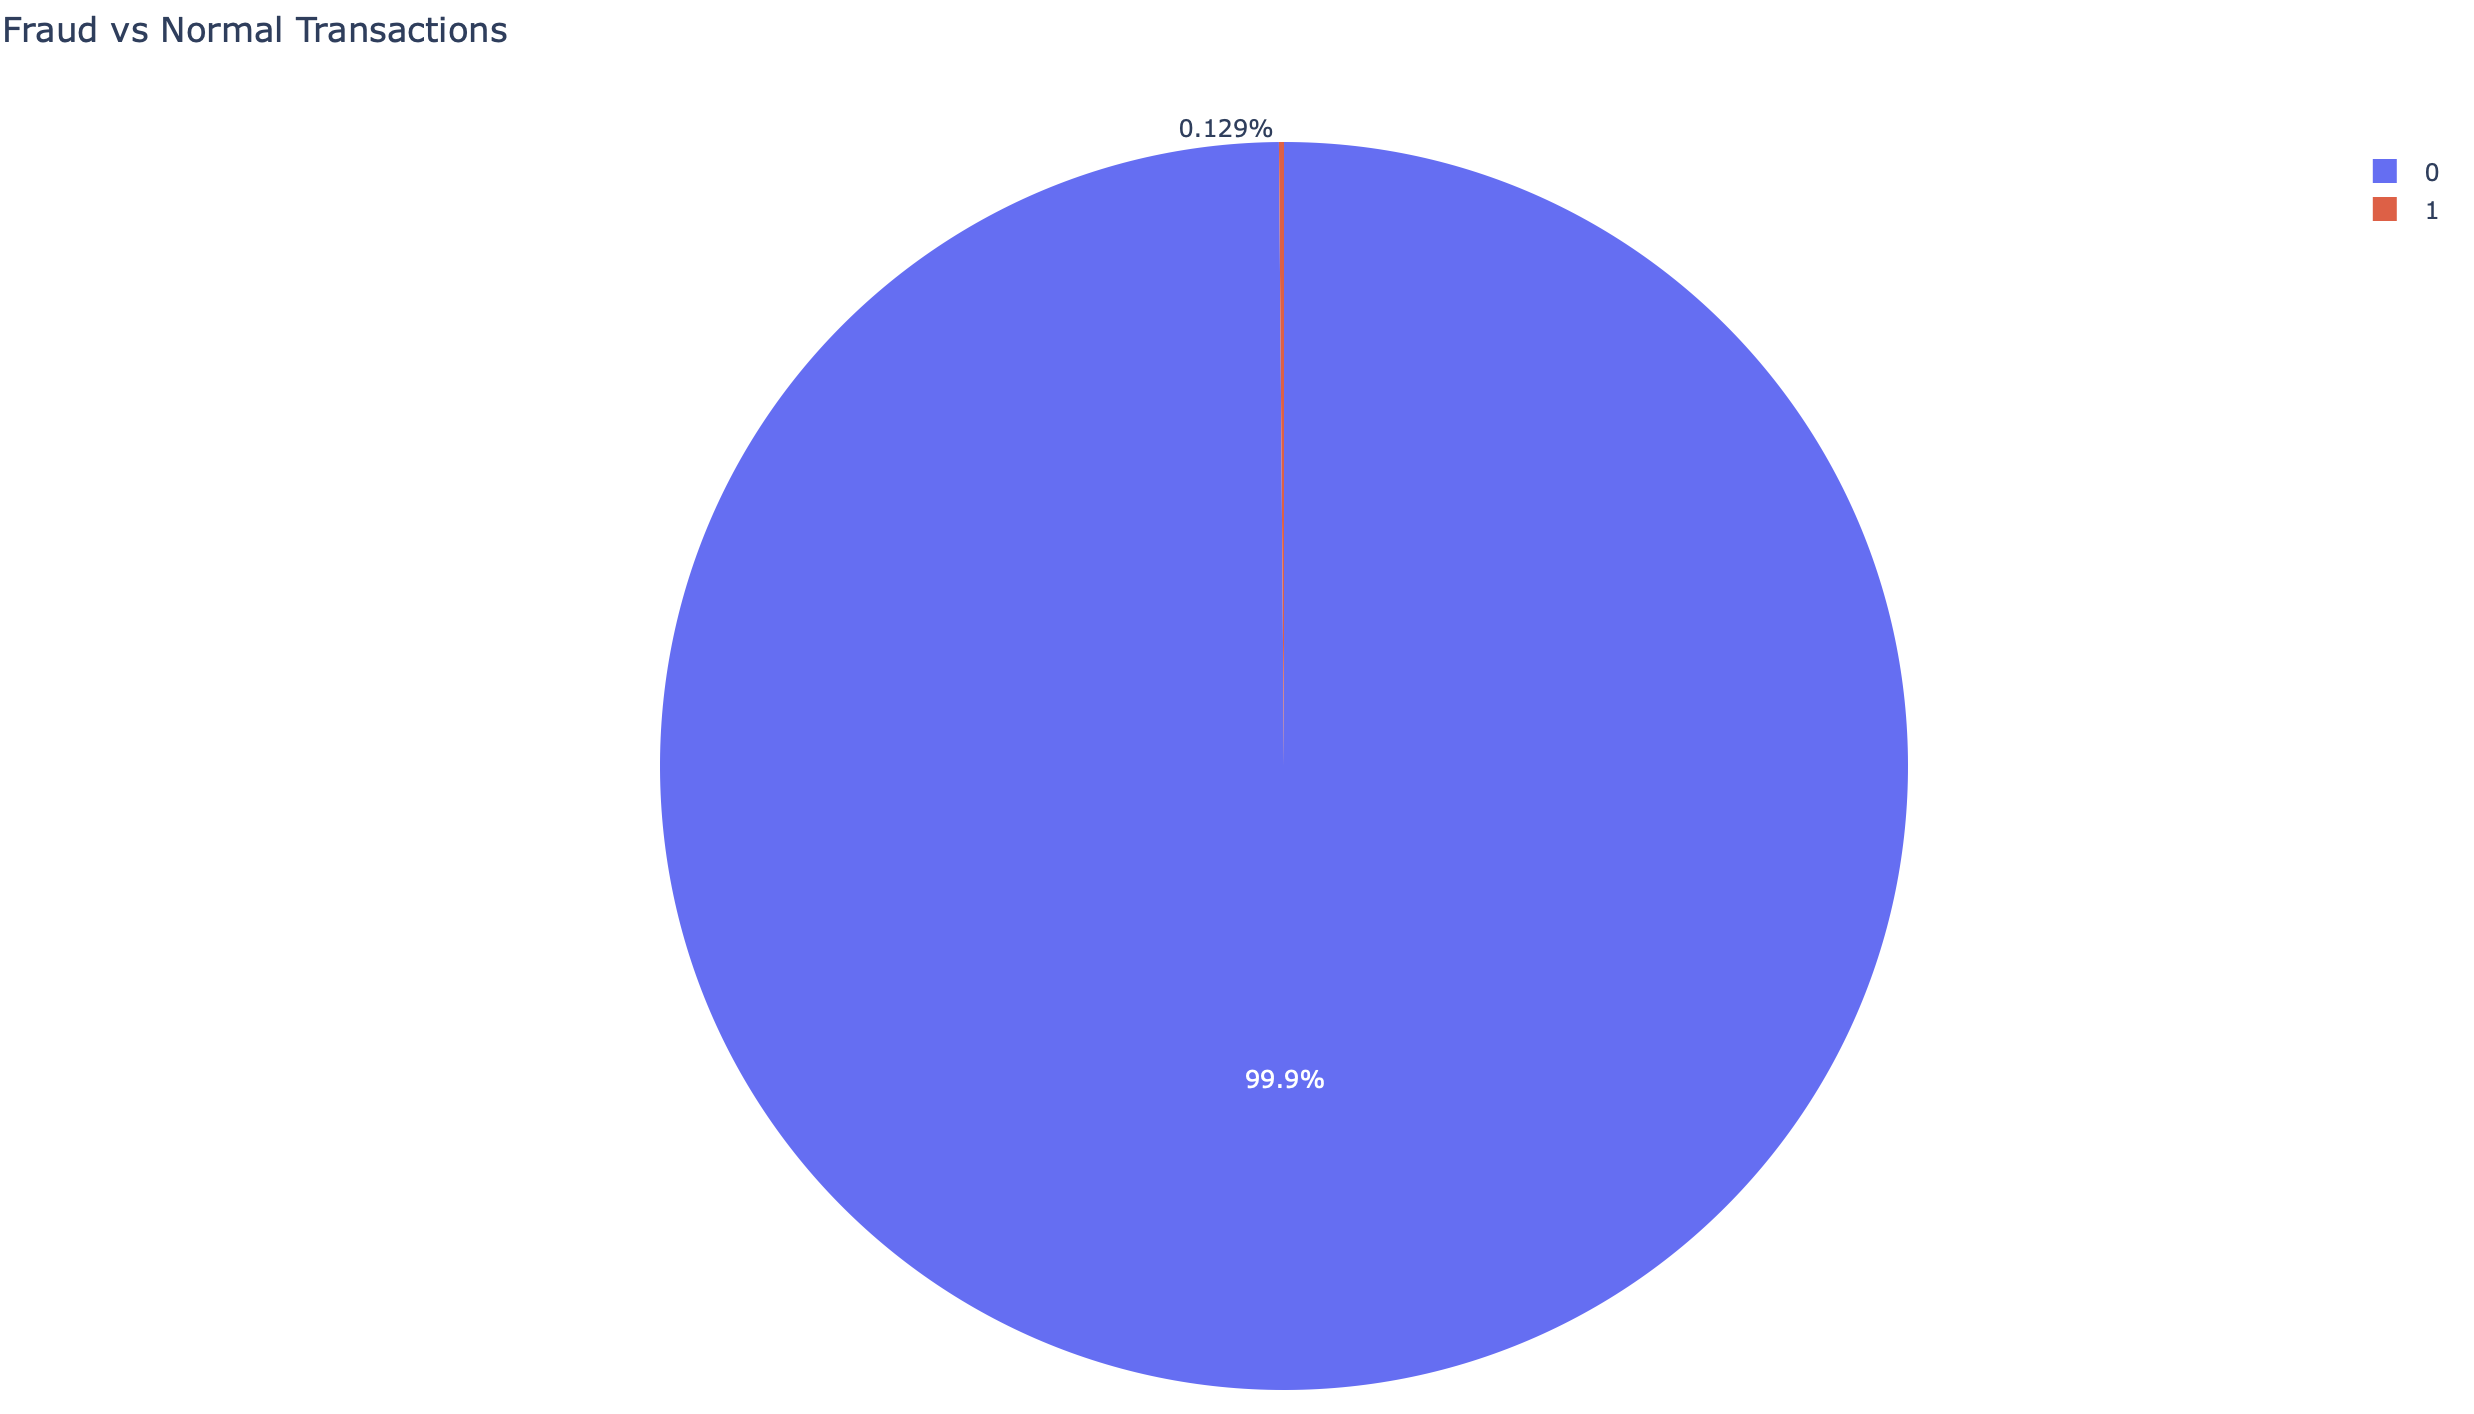

Preliminary analysis

In [ ]:
print("Shape:", df.shape)
print("\nClass distribution (isFraud):")
print(df['isFraud'].value_counts(normalize=True))

Preparing data for training
What happens:

Numerical features are selected for the model (text identifiers nameOrig and nameDest are excluded).

The target variable is isFraud.

Code:

In [ ]:
features = [
    'step',
    'amount',
    'oldbalanceOrg',
    'newbalanceOrig',
    'oldbalanceDest',
    'newbalanceDest'
]
X = df[features]
y = df['isFraud']  # goal variable

Data splitting
What happens:

The data is split into training (80%) and test (20%) samples.

Stratification (stratify=y) is used to preserve class proportions.

Code:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Model training
Why DecisionTreeClassifier?

Interpretability: it is easy to explain the rules used to make a conclusion.

Robustness to outliers: does not require feature normalization.

Fast training: suitable for prototyping.

Model parameters:

max_depth=10 — depth limit to prevent overfitting.

min_samples_split=5 — minimum number of samples for node splitting.

min_samples_leaf=2 — minimum number of samples in a leaf.

Code:

In [ ]:
model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,           # depth limitation to avoid overfitting
    min_samples_split=5,
    min_samples_leaf=2
)
model.fit(X_train, y_train)

Saving the model
What happens:

The trained model is saved to the fraud_detection_model.pkl file using joblib.

Code:

In [ ]:
joblib.dump(model, 'fraud_detection_model.pkl')
print("Model saved as 'fraud_detection_model.pkl'")

Predictions on the test sample

In [ ]:
y_pred = model.predict(X_test)

Model evaluation
Metrics:

Accuracy — overall classification accuracy.

Classification Report — precision, recall, F1 score for each class.

Confusion Matrix — error matrix (TP, FP, FN, TN).

Code:

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# 3. Report in details
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Output example:

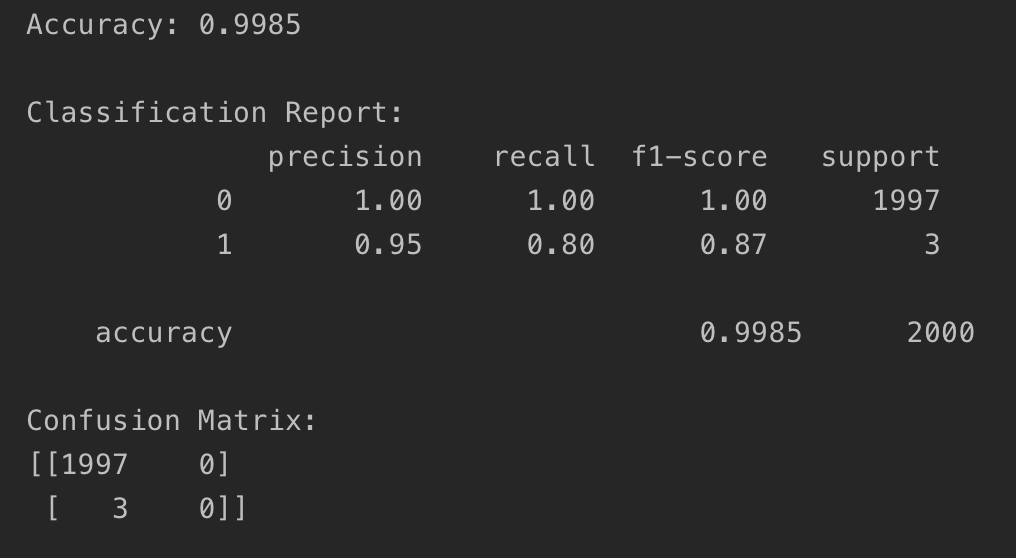

Prediction example
What happens:

The model makes a prediction for a new transaction.

The class (0 or 1) and probabilities for each class are displayed.

Code:

In [ ]:
sample = pd.DataFrame([[100, 5000, 10000, 5000, 20000, 25000]], columns=features)
prediction = model.predict(sample)
probability = model.predict_proba(sample)
print(f!Sample prediction: {prediction[0]} (Fraud: {bool(prediction[0])})")
print(f!Prediction probabilities: {probability[0]}")

Output example:

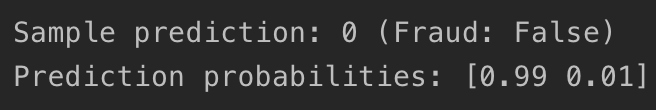

Interpretation of results

Model accuracy
Accuracy ≈ 0.9985 (99.85%) — the model correctly classifies almost all transactions.

High precision for class 0 (1.00) — few false positives on normal transactions.

Low recall for class 1 (0.80) — some fraudulent transactions may be missed.

Why was this model chosen?
Simplicity and speed — suitable for rapid prototyping.

Interpretability — decision-making rules can be analyzed.

No need for scaling — works with raw values.

Limitations
May be retrained on noisy data (therefore, tree depth is limited).

Requires regular retraining when fraud patterns change.

How to use the model in the future

Loading the saved model and predicting new data:

In [ ]:
model = joblib.load('fraud_detection_model.pkl')
new_data = pd.DataFrame([[...]], columns=features)
prediction = model.predict(new_data)

Libraries used and their purpose


Below is a detailed analysis of all the libraries used, with justification for their selection.

1. pandas 
*  Purpose: loading, storing, and preprocessing tabular data. 
*  Why this one: 
*  Optimal for working with CSV files and tables. 
*  Provides convenient methods: read_csv(), head(), info(), value_counts(). 
*  Allows you to easily select columns, filter rows, and convert types. 
*  Key functions in the project: 
*  pd.read_csv() — loading the dataset. 
*  df[features] — selecting features for the model. 
*  value_counts(normalize=True) — analyzing class distribution

2. numpy 
*  Purpose: working with numerical arrays and matrices. 
*  Why this one: 
*  Provides fast vectorized processing of numbers. 
*  Is the basis for pandas and scikit‑learn. 
*  Supports linear algebra operations necessary for ML. 
*  In the project: used indirectly through pandas and sklearn (no explicit calls, but critical for performance)


3. scikit‑learn (sklearn) 
*  Purpose: machine learning: preprocessing, model training, evaluation.
*  Why this one:
*  Standard library for ML in Python.
*  Unified API for different algorithms.
*  Builtin validation and metrics tools. 
*  Modules and functions used: 
*  train_test_split — splitting data into train/test. 
*  DecisionTreeClassifier — decision tree model. 
*  accuracy_score, classification_report, confusion_matrix — quality assessment. 
*  Reasons for choosing this model: 
*  Decision trees are interpretable: rules can be visualized. 
*  Does not require feature normalization (convenient for financial data with different scales). 
*  Fast training and prediction


4. plotly.express
*  Purpose: interactive data visualization.
*  Why this one:
*  Creates beautiful, scalable graphs with interactive elements (tooltips, zoom). 
*  Easy integration with pandas. 
*  Suitable for demonstrating class distribution (pie chart). 
*  Function in the project: px.pie() — visualization of the proportion of fraudulent and normal transactions

5. joblib 
*  Purpose: saving and loading Python objects (especially ML models). 
*  Why this one: 
*  Efficient for serializing/deserializing large objects (e.g., trained models). 
*  Faster than pickle for sklearn objects. 
*  Standard tool in the sklearn ecosystem. 
*  Function in the project: joblib.dump() — saves the trained model to the file fraud_detection_model.pkl.


 Final conclusion on tool selection


*  The combination of pandas + sklearn is the gold standard for ML projects in Python: 
*  pandas is responsible for data, 
*  sklearn is responsible for modeling. 
*  Plotly is added for a visual demonstration of class imbalance (important for interpreting the task).
*  Joblib ensures reproducibility: the trained model can be reused without retraining. 


All libraries: 
*  Open source and widely supported. 
*  Have extensive documentation and community support. 
*  Are compatible with each other and easily integrated into pipelines.
